# Analysis of IB019 - VIS/NIR Side-view
***
- Setaria
- mutant population
- had some small plants so will need to use top view for some

### Read in packages

In [3]:
#!/usr/bin/env python

# I made a copy of this because I will have to update some functions if I want to output ndvi summary stats.
# Errors being thrown for 'max value' in threshold functions.
# I think this max has been set at 255 as default and is no longer an option?
# The first step will be to use the code below on the server to create the kernel here in jupyter.

# first activate the environment then change the relevant fields here and run. 
# python -m ipykernel install --user --name plantcv_4.x_21Feb23 --display-name "Python (plantcv_4.x_21Feb23)"

# Has now been successfully updated to use kernel plantcv_4.0.1_01Sep23

import sys, traceback
import cv2
import os
import re
import numpy as np
import argparse
import string
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs

In [4]:
#STEP 1: READ IN IMAGE
#this section gets uncommented to go into .py conversion
# def options():
#     parser = argparse.ArgumentParser(description="Imaging processing with opencv")
#     parser.add_argument("-i", "--image", help="Input image file.", required=True)
#     parser.add_argument("-o", "--outdir", help="Output directory for image files.", required=False)
#     parser.add_argument("-r","--result", help="result file.", required= False )
#     parser.add_argument("-r2","--coresult", help="result file.", required= False )
#     parser.add_argument("-w","--writeimg", help="write out images.", default=False, action="store_true")
#     parser.add_argument("-D", "--debug", help="Turn on debug, prints intermediate images.", action="store_true")
#     args = parser.parse_args()
#     return args

In [5]:
# SNAP2

# This cell is from the VIS + NIR Tutorial, the new way to specify options?
#Import a sample image and define it to be used in the notebook

# small plant
args = WorkflowInputs(
    images=["/home/cluebbert/plantcv-ts/IB019/ts_img/IB019/SV_example_small/VIS_SV_0_z1_h1_g370_e1500_v500_11528_0.png",
            "/home/cluebbert/plantcv-ts/IB019/ts_img/IB019/SV_example_small/NIR_SV_0_z1_h1_g0_e21500_v500_11531_0.png"],
    names="vis,nir",
    result="/home/cluebbert/plantcv-ts/IB019/IB019_single_image_out_colorcorrect.csv",
    outdir="/home/cluebbert/plantcv-ts/IB019/",
    writeimg=True,
    debug="plot"
)

# Initial try
# args = WorkflowInputs(
#     images=["/home/cluebbert/plantcv-ts/IB019/ts_img/IB019/SV_example/VIS_SV_0_z1_h1_g370_e1500_v500_117140_0.png",
#             "/home/cluebbert/plantcv-ts/IB019/ts_img/IB019/SV_example/NIR_SV_0_z1_h1_g0_e21500_v500_117143_0.png"],
#     names="vis,nir",
#     result="/home/cluebbert/plantcv-ts/IB019/IB019_single_image_out_colorcorrect.csv",
#     outdir="/home/cluebbert/plantcv-ts/IB019/",
#     writeimg=True,
#     debug="plot"
# )

In [6]:
# This cell is from the VIS + NIR Tutorial, the new way to specify options?
# Set debug to the global parameter 
pcv.params.debug = args.debug

# Change the display settings
pcv.params.dpi = 100
pcv.params.text_size = 20
pcv.params.text_thickness = 20
pcv.params.debug_outdir = args.outdir

## VIS

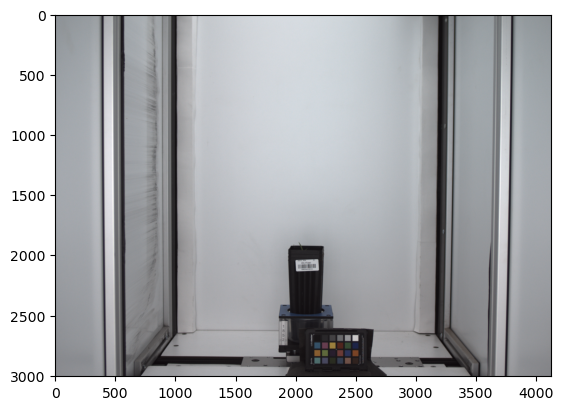

In [7]:
# Read image
img, path, filename = pcv.readimage(args.vis)

### Color correct

In [8]:
#First, find the color card. You won't see any output of this function. 

dataframe1, start1, space1 = pcv.transform.find_color_card(rgb_img=img, background='light')


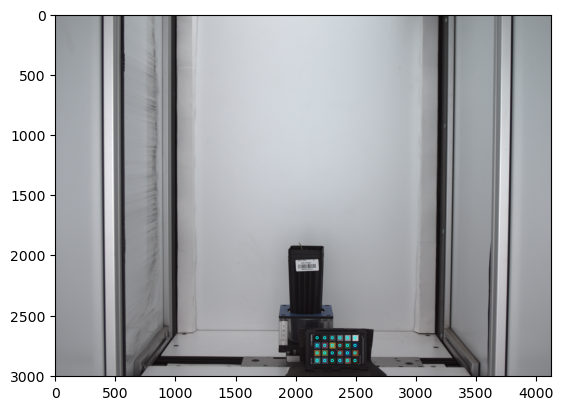

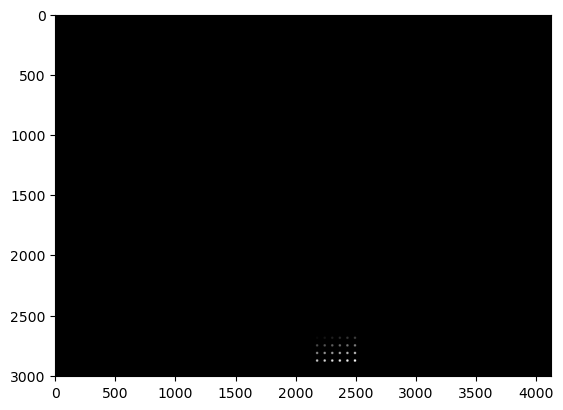

In [9]:
#Make a color card mask for your image. You should see that the color card has little circles on it, nicely inside the color squares.
#If the color card can't be found, you may need to set the start coordinate and spacing manually. 

card_mask = pcv.transform.create_color_card_mask(img, radius=10, start_coord=start1, 
                                                   spacing=space1, nrows=4, ncols=6)

In [10]:
#### Begin new color correction ####

#Make a color card matrix 

headers, card_matrix = pcv.transform.get_color_matrix(rgb_img=img, mask=card_mask)

In [11]:
# Define the standard color card matrix, we know what the colors of those chips should be in a "perfect" image, so we will correct to those values
# Look at where your white chip is in the image to determine which position your card is in (pos)


#pos     = reference value indicating orientation of the color card. The reference
       #         is based on the position of the white chip:
        #        pos = 0: bottom-left corner
        #        pos = 1: bottom-right corner
        #        pos = 2: top-right corner
        #        pos = 3: top-left corner

std_color_matrix = pcv.transform.std_color_matrix (pos=2)

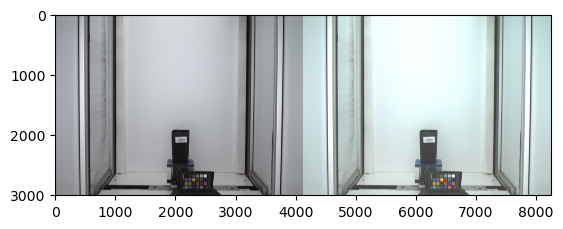

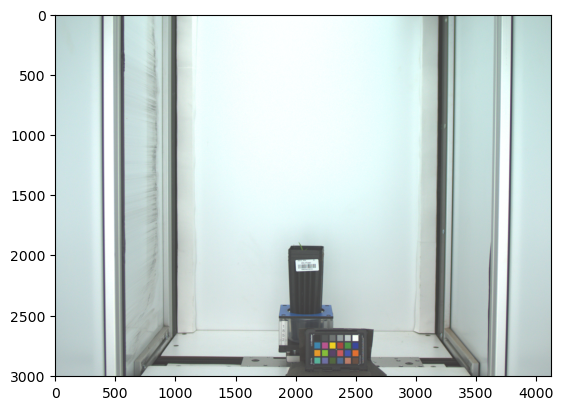

In [12]:
#Color correct your image to the standard values
#look at the image - does the color look good? If it looks crazy, you probably don't have the card found well and need to go back and define the start and spacing for the card

color_corrected_img = pcv.transform.affine_color_correction(img, card_matrix, std_color_matrix)
pcv.plot_image(color_corrected_img)

### Background image

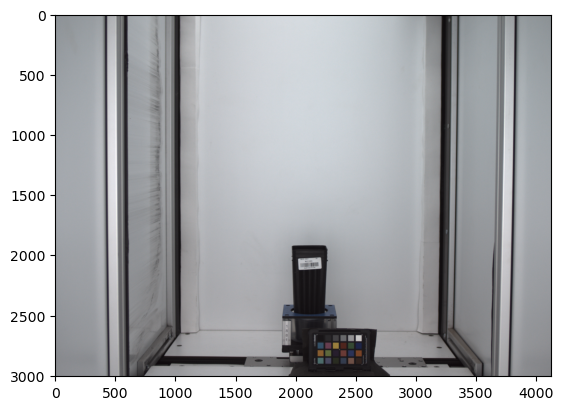

In [13]:
#read in background image. 
# Da000AA135528/2024-02-04/snapshot63879/VIS_SV_0_z1_h1_g370_e1500_v500_123344_0.png
img_bkgrd, path_ignore, filename_ignore = pcv.readimage('/home/cluebbert/plantcv-ts/IB019/empty_pot_pics/VIS_SV_0_z1_h1_g370_e1500_v500_5006_0.png')

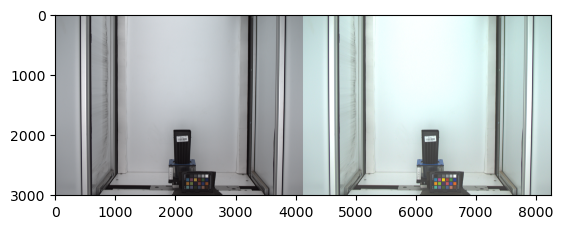

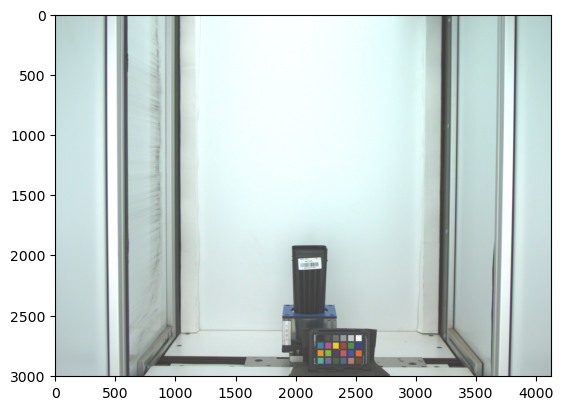

In [14]:
# color correct background 
bkg_color_corrected_img = pcv.transform.affine_color_correction(img_bkgrd, card_matrix, std_color_matrix)
pcv.plot_image(bkg_color_corrected_img)

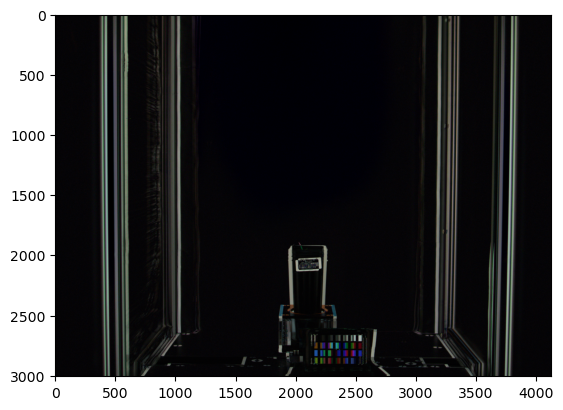

In [15]:
#Difference between image and background
#I use this to plot the background images
from matplotlib import pyplot as plt
#subtract background (original)
bkg_sub_img=cv2.absdiff(bkg_color_corrected_img, color_corrected_img)

#subtract background (new)
#bkg_sub_img=pcv.background_subtraction(nir, img_bkgrd)

#plot in grayscale with scalebar
imgplot = plt.imshow(bkg_sub_img)

### Threshold

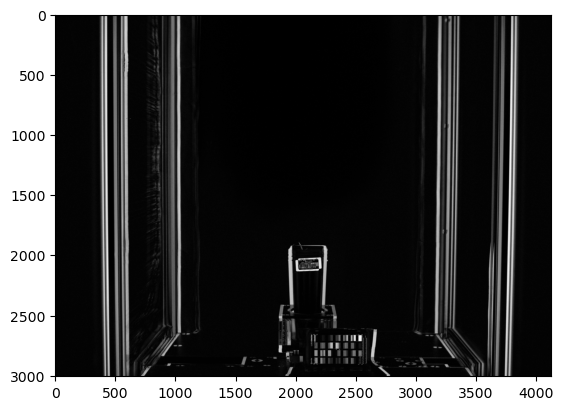

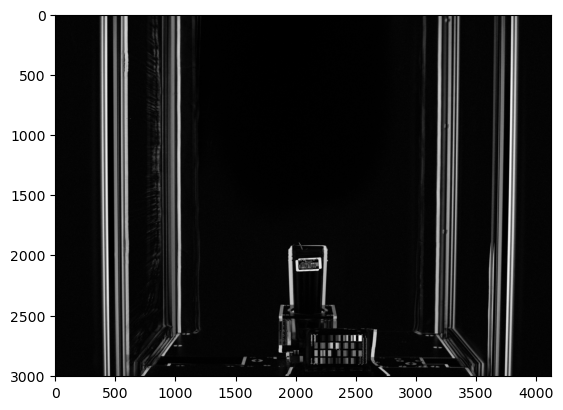

alt.Chart(...)

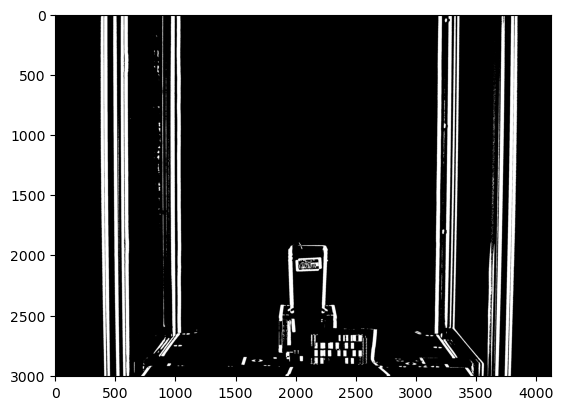

In [16]:
############Threshold Background subtracted image##############
#STEP 2: EXTRACT CHANNELS AND GENERATE MASKS
l = pcv.rgb2gray_lab(rgb_img=bkg_sub_img, channel='l')
l_mblur = pcv.median_blur(gray_img =l, ksize =2)
pcv.visualize.histogram(img=l_mblur, mask=None, bins=256, title=None)
l_thresh = pcv.threshold.binary(gray_img =l_mblur, threshold =50,object_type ='light')


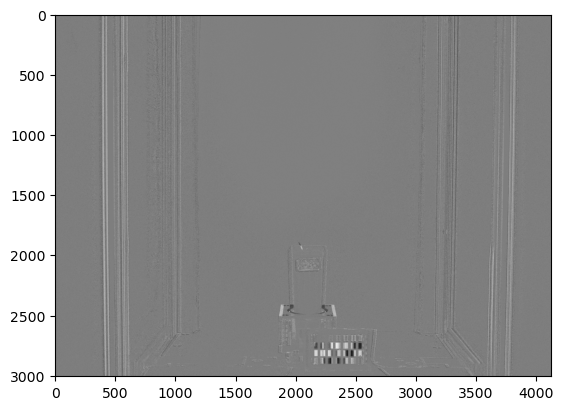

alt.Chart(...)

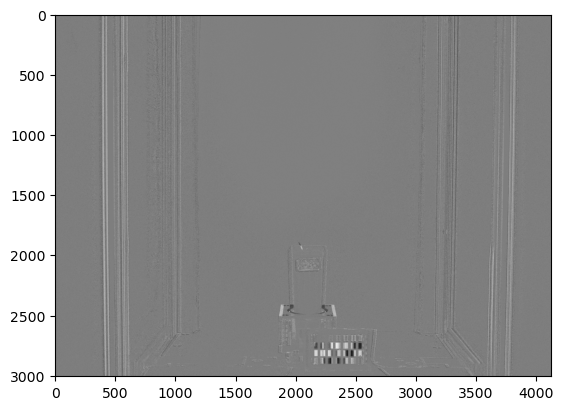

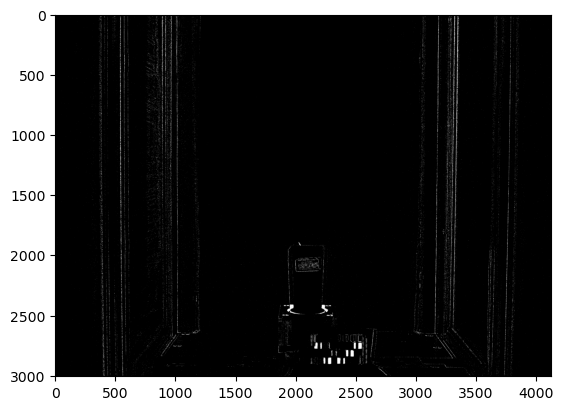

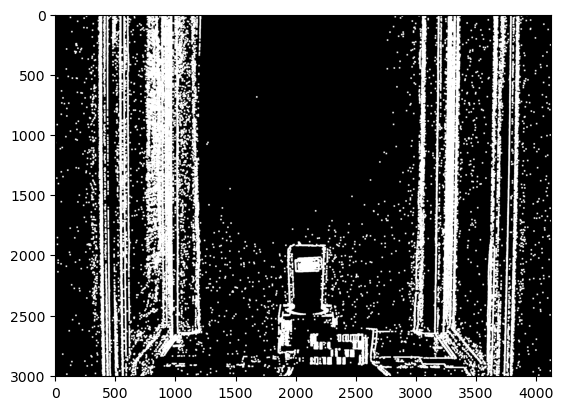

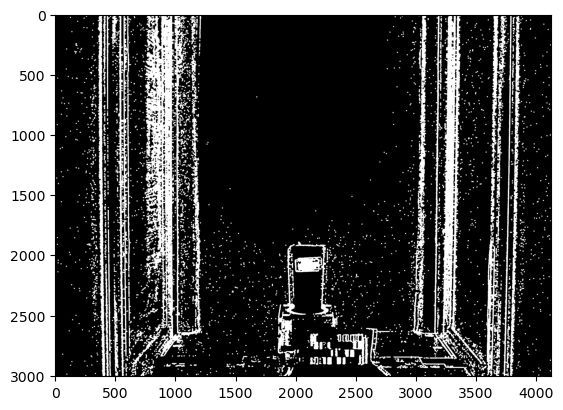

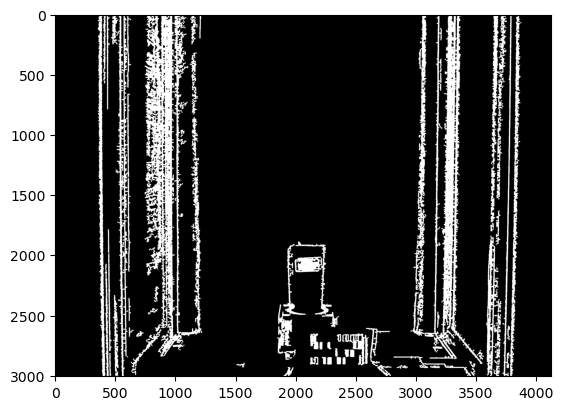

In [17]:
#THRESHOLD 2: BLUE-YELLOW
# Convert RGB to LAB and extract the Blue-yellow channel
b = pcv.rgb2gray_lab(rgb_img=bkg_sub_img, channel='b')
pcv.visualize.histogram(img=b, mask=None, bins=256, title=None)
# median blur
b_mblur = pcv.median_blur(gray_img =b, ksize =1)
# Threshold the blue-yellow image
b_thresh = pcv.threshold.binary(gray_img=b_mblur, threshold=115, object_type='dark')
# dilate
b_dil = pcv.dilate(gray_img=b_thresh, ksize=13, i=1)
# erode 
b_erd = pcv.erode(gray_img=b_dil, ksize=5, i=1)

b_fill = pcv.fill(bin_img=b_erd, size=1000)

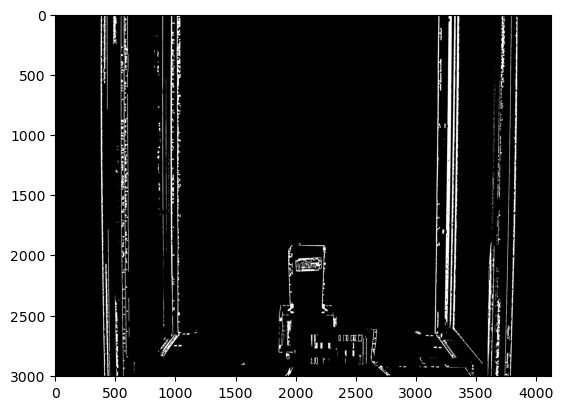

In [18]:
#Combine masks
# Join the thresholded saturation and blue-yellow masks
bl = pcv.logical_and(bin_img1=l_thresh, bin_img2=b_fill)

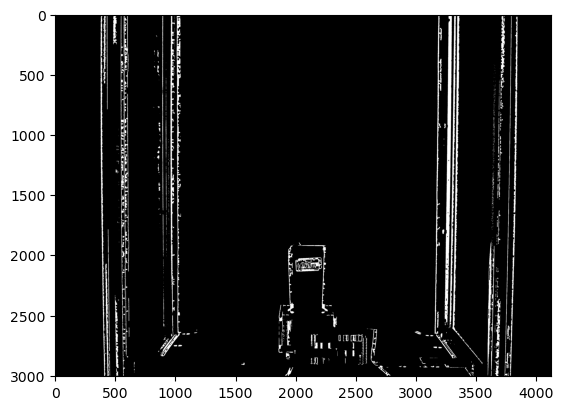

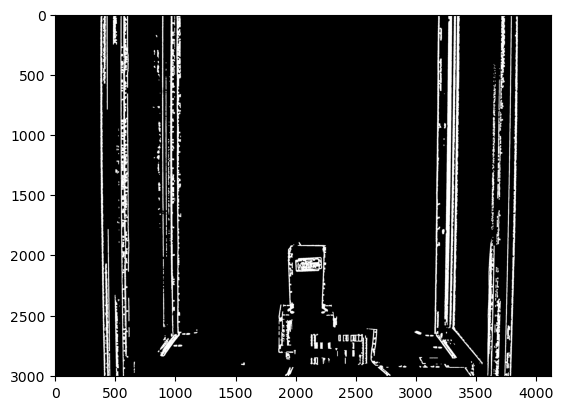

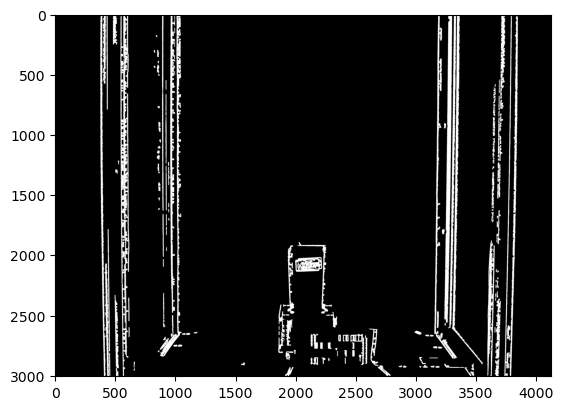

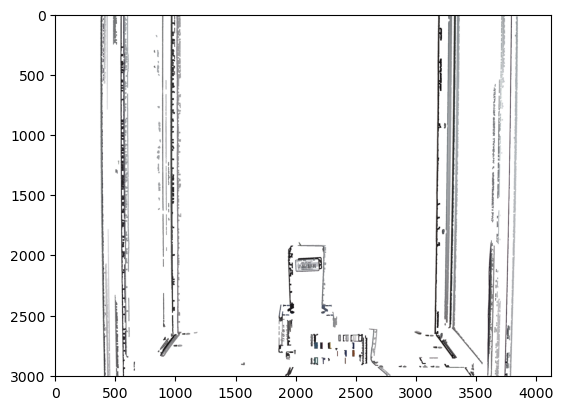

In [19]:
#Refine masks, apply to image
# Fill small noise
bsa_fill1 = pcv.fill(bin_img=bl, size=2)

# Dilate to join small objects with larger ones
bsa_fill2=pcv.dilate(gray_img=bsa_fill1, ksize=3, i=2)
# Fill dilated image mask
bsa_fill3=pcv.fill(bin_img=bsa_fill2,size=150)
# Apply Mask (for vis images, mask_color=white)
masked = pcv.apply_mask(img=img, mask=bsa_fill3, mask_color='white')

### Select region of interest

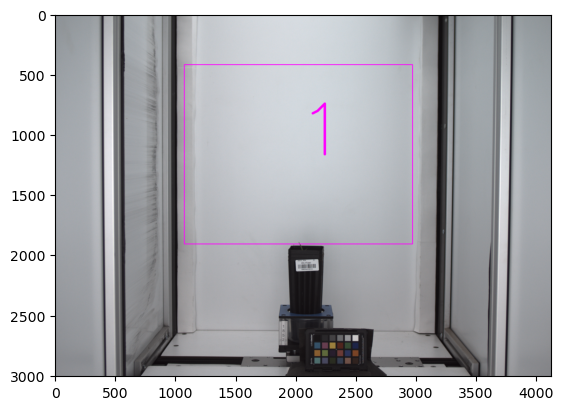

In [42]:
# Define ROI

# old code
#roi1, roi_hierarchy = pcv.roi.rectangle(img=img, x=1500, y=620, h=1345, w=1000)

roi1 = pcv.roi.rectangle(img=img, x=1075, y=420, h=1490, w=1900)

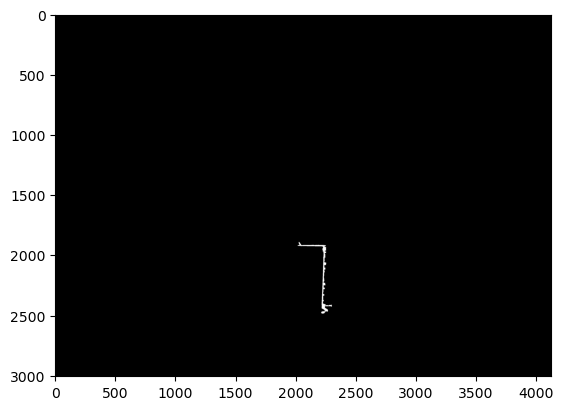

In [43]:
#mask = pcv.roi.filter(mask=bin_img, roi=roi, roi_type="partial")
mask_roifilt_plant = pcv.roi.filter(mask=bsa_fill3, roi=roi1, roi_type="partial")

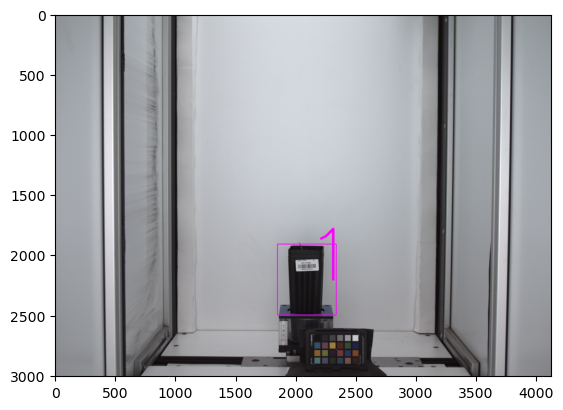

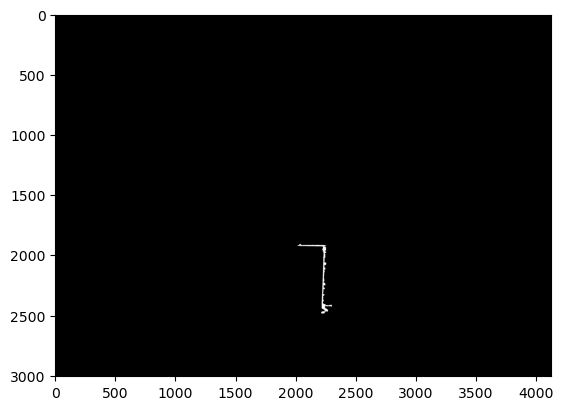

In [45]:
# make a "pot only" mask
# roi1 = pcv.roi.rectangle(img=img, x=1075, y=420, h=1540, w=1800)
# roipot = pcv.roi.rectangle(img=img, x=1820, y=1960, h=600, w=350)
roipot = pcv.roi.rectangle(img=img, x=1850, y=1910, h=590, w=490)

# make mask 
pot_mask = pcv.roi.filter(mask=mask_roifilt_plant, roi=roipot, roi_type="cutto")

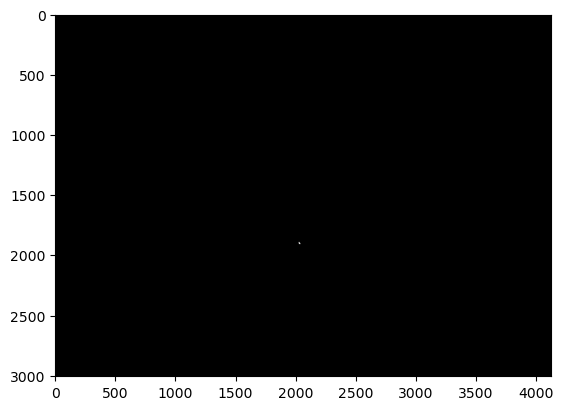

In [46]:
# remove pot mask from full mask 

#plantcv.image_subtract(gray_img1, gray_img2)

mask_roifilt = pcv.image_subtract(mask_roifilt_plant, pot_mask)

### Analyze mask

In [ ]:
#STEP 4: ANALYZE IMAGE
############## VIS Analysis: size height color etc ################

# Set Boundary Line   at top of pot, so height is calculated from top of pot. useful when leaves droop below this level 
#pot height used to be 1365
pot_height=2000

#this is just an option to make the debug pic easier to see
pcv.params.line_thickness = 5

#outfile=False
if args.writeimg==True:
    outfile=args.outdir+"/"+filename
    
#if pot is empty (masked image has no objects), return everything as 0 instead of crashing
if np.sum(mask_roifilt) == 0:
    pcv.outputs.add_observation(sample = 'default', variable='height', trait='height',
                            method='plantcv.plantcv.analyze_object', scale='pixels', datatype=int,
                            value=0, label='pixels')
else:

# If pot not empty: object combine kept objects
#apply object (roi_objects, hierarchy3) to the raw image (img), outputting an object-based mask
    #obj, mask = pcv.object_composition(img=color_corrected_img, contours=roi_objects, hierarchy=hierarchy3)
    
    # Shape properties relative to user boundary line (optional)
    # Calculate height from top of pot. useful when leaves droop below this level 
    boundary_images = pcv.analyze.bound_horizontal(color_corrected_img, mask_roifilt, pot_height)

    # Find shape properties, output shape image (optional)
    #analyze object (obj) in raw image (img) with final object-based mask applied (mask)
    #shape_img = pcv.analyze_object(img=color_corrected_img, obj=obj, mask=mask)
    shape_img = pcv.analyze.size(img=color_corrected_img, labeled_mask=mask_roifilt)
    
    # Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)
    #color_img= pcv.analyze_color(rgb_img=color_corrected_img, mask=mask, hist_plot_type=None)
    color_img= pcv.analyze.color(rgb_img=color_corrected_img, labeled_mask=mask_roifilt)

## NIR

### Warp image 

In [ ]:
# Read in NIR image

nir, path1, filename_nir = pcv.readimage(filename=args.nir, mode='gray')

In [ ]:
# my values, from color card images

# use other jupyter notebook to tweak these coordinates.
# They are from the Cc.... pictures of the large color cards 

pcv.params.marker_size = 50
pcv.params.line_thickness = 2

# blue, cyan, green, yellow, red, purple

mask_warped, mat = pcv.transform.warp(img=mask_roifilt, refimg=nir,
                                      pts=[(1800, 1470), (2500, 1470), (2500, 2186), (2500, 2539), (1785, 2532), (1785, 2183)],
                                      refpts=[(243,275), (386,275), (386, 422), (386, 499), (242, 499), (242, 423)],
                                      method='lmeds')

# check with image
# pcv.visualize.overlay_two_imgs(mask_warped, nir, alpha=0.5)

In [ ]:
# looks like mask needs to shift slightly 

mask_warped_position = pcv.crop_position_mask(img = nir, mask = mask_warped, x = 0, y = 17, h_pos = "left", v_pos = "top")

# cropped2 = pcv.crop_position_mask(img=img, mask=mask, x=40, y=3, v_pos="top", h_pos="right")

### analyze 

In [ ]:
# Analyze NIR pixel intensity values of the plant

#nir_hist = pcv.analyze_nir_intensity(gray_img=nir, mask=mask_warped, bins=100, label="NIR")
nir_hist = pcv.analyze.grayscale(gray_img=nir, labeled_mask=mask_warped_position, bins=100, label="NIR")

### NDVI

I can't figure out how to shift the image over like I did with the mask to lineup the two images. You need to do this to get NDVI. 

In [ ]:
# # Warp VIS image to make NDVI
# vis_warped, mat = pcv.transform.warp(img=color_corrected_img, refimg=nir,
#                                       pts=[(1800, 1470), (2500, 1470), (2500, 2186), (2500, 2539), (1785, 2532), (1785, 2183)],
#                                       refpts=[(243,275), (386,275), (386, 422), (386, 499), (242, 499), (242, 423)],
#                                       method='lmeds')

# # vis_warped_position = pcv.crop_position_mask(img = color_corrected_img, mask = vis_warped, x = 0, y = 0, h_pos = "left", v_pos = "top")

# # this doesn't work, color vs grayscale?
# # wanted to see if the warp was lining the images up
# # pcv.visualize.overlay_two_imgs(vis_warped, nir, alpha=0.5)

In [ ]:
# # function image_fusion needs possible wavelengths of input images
# wvs1 = [480.0, 550.0, 670.0]
# wvs2 = [800.0]

# # Add two images together
# fused_img = pcv.image_fusion(img1=vis_warped, img2=nir, wvs1=wvs1, wvs2=wvs2, 
#                              array_type="vis-nir_fusion")

In [ ]:
# ndvi = pcv.spectral_index.ndvi(fused_img)

# # Pseudocolor the NDVI image
# colmap = pcv.visualize.pseudocolor(gray_img=ndvi.array_data, mask=mask_warped, cmap="RdYlGn", 
#                                    min_value=-0.8, max_value=0.8)

### Analyze Image

In [ ]:
#if pot is empty (masked image has no objects), return everything as 0 instead of crashing
if np.sum(mask_roifilt) == 0:
    pcv.outputs.add_observation(sample = 'default', variable='height', trait='height',
                            method='plantcv.plantcv.analyze_object', scale='pixels', datatype=int,
                            value=0, label='pixels')
else:

# If pot not empty: object combine kept objects
#apply object (roi_objects, hierarchy3) to the raw image (img), outputting an object-based mask
    #obj, mask = pcv.object_composition(img=color_corrected_img, contours=roi_objects, hierarchy=hierarchy3)
    
    # Shape properties relative to user boundary line (optional)
    # Calculate height from top of pot. useful when leaves droop below this level 
    boundary_images = pcv.analyze.bound_horizontal(color_corrected_img, mask_roifilt, pot_height)

    # Find shape properties, output shape image (optional)
    #analyze object (obj) in raw image (img) with final object-based mask applied (mask)
    #shape_img = pcv.analyze_object(img=color_corrected_img, obj=obj, mask=mask)
    shape_img = pcv.analyze.size(img=color_corrected_img, labeled_mask=mask_roifilt)
    
    # Determine color properties: Histograms, Color Slices and Pseudocolored Images, output color analyzed images (optional)
    #color_img= pcv.analyze_color(rgb_img=color_corrected_img, mask=mask, hist_plot_type=None)
    color_img= pcv.analyze.color(rgb_img=color_corrected_img, labeled_mask=mask_roifilt)

In [ ]:
# # output summary stats of ndvi 
# #if pot is empty (masked image has no objects), return everything as 0 instead of crashing
# if np.sum(mask_roifilt) == 0:
#     pcv.outputs.add_observation(sample = 'default', variable='height', trait='height',
#                             method='plantcv.plantcv.analyze_object', scale='pixels', datatype=int,
#                             value=0, label='pixels')
# else:
    
#     pcv.analyze.spectral_index(index_img=ndvi, 
#                                labeled_mask=mask_warped,
#                                label='ndvi',
#                               min_bin=-1, max_bin=1)


In [ ]:
# Output shape and color and NIR data
#pcv.print_results(args.result)
#pcv.outputs.save_results(args.result,outformat="json")
pcv.outputs.save_results(args.result,outformat="csv")

In [ ]:
#debug plot: comment these out when running full image database
#print shape image for debugging purposes

if np.sum(mask_roifilt) != 0:
    pcv.print_image(shape_img,args.outdir+"/VIS/"+filename[:-4]+"_shape.png")
    pcv.print_image(boundary_images,args.outdir+"/VIS/"+filename[:-4]+"_bound.png")

    outimg = pcv.visualize.overlay_two_imgs(img, mask_roifilt, alpha=0.5)
    pcv.print_image(outimg,args.outdir+"/VIS/"+filename[:-4]+"_overlay.png")

    outimg = pcv.visualize.overlay_two_imgs(vis_warped, nir, alpha=0.5)
    pcv.print_image(outimg,args.outdir+"/VIS/"+filename[:-4]+"_NIRVISoverlay.png")